# Извлечение динамики взаимоотношений персонажей из худ. литературы

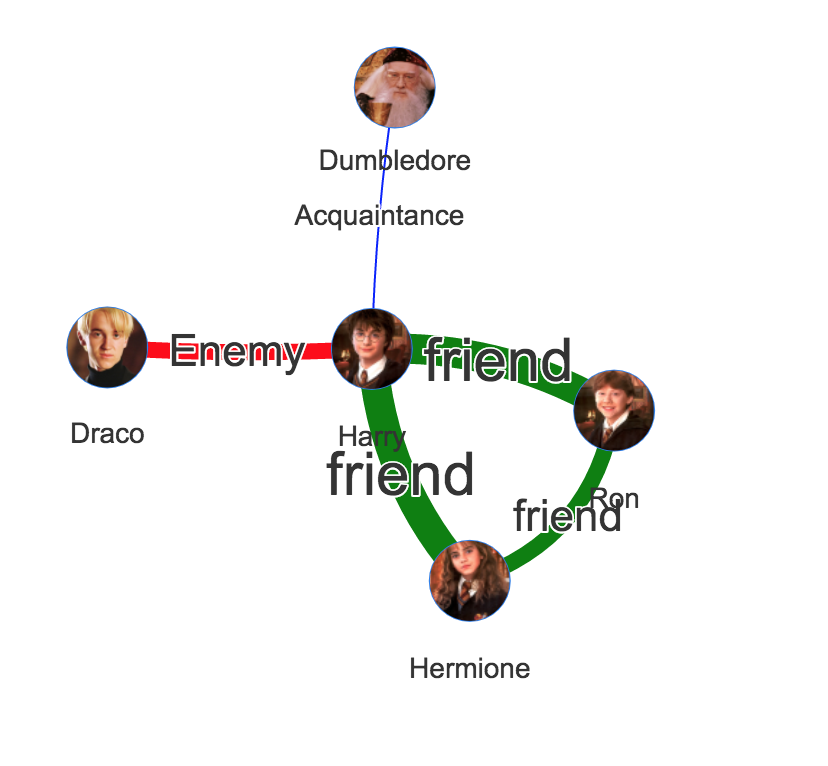

(From [CharacterGo](https://github.com/zfsang/CharacterGo) project)

## Идея: на вход – текст, на выход – таймлайн взаимоотношений персонажей


Почему: 
- не на слуху
- интересная задача для исследований
- личная предрасположенность

```



























```

# Данные
- ~~RDF~~
- ~~Фанатские Вики~~
- ~~короткое содержание~~
- ~~[Major Characters in American Fiction (Henry Holt Reference Book)](https://www.amazon.com/Major-Characters-American-Fiction-Reference/dp/0805045643/ref=sr_1_1?ie=UTF8&qid=1334174229&sr=8-1)~~
- Аннотированные данные, как по заказу – [Philip Massey, Patrick Xia, David Bamman and Noah A. Smith (2015), Annotating Character Relations in Literary Texts, ArXiv.](https://github.com/dbamman/characterRelations)
- Данные для смежной unsupervised задачи – [Snigdha Chaturvedi, Shashank Srivastava, Hal Daume III and Chris Dyer, Modeling Evolving Relationships Between Characters in Literary Novels. In Proceedings of the Thirtieth AAAI Conference on Artificial Intelligence, February 12-17, 2016, Phoenix, Arizona, USA. Pages 2704–2710.](https://www.aaai.org/ocs/index.php/AAAI/AAAI16/paper/view/12408)

```



























```

In [5]:
import pandas as pd
anns = pd.read_csv('./data/character_relation_annotations.txt.gz', sep='\t')
anns.head(10)

,annotator,change,title,author,character_1,character_2,affinity,coarse_category,fine_category,detail
0,annotator_1,yes,Don Quixote,Miguel de Cervantes,Sancho Panza,Don Quixote,positive,professional,servant,he ends up taking more authority and advising ...
1,annotator_1,no,Don Quixote,Miguel de Cervantes,Rocinante,Don Quixote,positive,professional,person offering service to client,Rocinante is his horse
2,annotator_1,no,Don Quixote,Miguel de Cervantes,Dulcinea del Toboso,Don Quixote,positive,social,unrequited love interest,NR
3,annotator_1,no,Don Quixote,Miguel de Cervantes,Cervantes,Cide Hamete Benengeli,positive,professional,colleague,NR
4,annotator_1,no,Don Quixote,Miguel de Cervantes,The Duke and Duchess,Don Quixote,negative,social,enemy,NR
5,annotator_1,no,Don Quixote,Miguel de Cervantes,The Duke and Duchess,Sancho Panza,negative,social,enemy,NR
6,annotator_1,no,Don Quixote,Miguel de Cervantes,Don Quixote,Altisidora,negative,social,lovers,she is mocking him
7,annotator_1,no,Don Quixote,Miguel de Cervantes,Altisidora,The Duke and Duchess,positive,professional,servant,NR
8,annotator_1,no,Don Quixote,Miguel de Cervantes,The priest,Don Quixote,positive,social,friend,NR
9,annotator_1,no,Don Quixote,Miguel de Cervantes,Sampson Carrasco,Don Quixote,negative,social,enemy,NR


# Другие источники данных
- книги – [GITenberg](https://github.com/GITenberg)
- решение части задачи – [bookNLP](https://github.com/dbamman/book-nlp)

```



























```

# Метрики

Я судил о улучшениях/ухудшениях по precision/recall & F1

```



























```

# Бейзлайны: чужие
- [Feuding Families and Former Friends: Unsupervised Learning for Dynamic Fictional Relationships](http://www.aclweb.org/anthology/N16-1180)
- [Modeling Evolving Relationships Between Characters in Literary Novels](http://legacydirs.umiacs.umd.edu/~hal/docs/daume16literary.pdf)

CRF + Features

Actions based: These features are motivated by Vladimir Propp’s Structuralist narrative theory (Propp 1968) based insight that characters have a ‘sphere of actions’. We model the actions affecting the two characters by identifying all verbs in the sentence, their agents (using ‘nsubj’ and ‘agent’ dependency relations) and their patients (using ‘dobj’ and ‘nsubjpass’ relations). This information was extended using verbs conjunct to each other using ‘conj’. We also used the ‘neg’ relation to determine the negation status of each verb. We then extracted the following features:
- Are Team [F1]: agents (or patients) of a verb together.
- Acts Together [F2-F7]: verbs for which one of the characters was the agent and the other was patient
- Surrogate Acts Together [F8-F13]: These are high-recall features that analyze actions for which a character was an implicit/subtle agent or patient

Adverb based: These features model narrator’s bias in describing characters’ actions by analyzing the adverbs modifying the verbs identified in ‘Action based’ features (using ‘advmod’ dependency relations). For example, in S4 in Fig. 1 the fact that Tom nobly accepts the blame provides an evidence of a positive relationship.
- Adverbs Together [F14-F19] and Surrogate Adverbs Together [F20-F25]
- Lexical [F26-27]: These bag-of-words style features analyze the connotations of all words (excluding stop-words) occurring between pairs of mentions of the two characters in the sentence

Based on these lists, we extracted the following two types of features: 
- Frames Fired [F28-F30]: Three numeric features counting number of positive, negative and ‘relationship’ frames fired such that at least one of the characters belonged to the relevant frame-element.
- Frames Fired [F31-F33]: Three features counting number of positive, negative and ‘relationship’ frames fired.
FramePolarity:
```
Frames with Negative Connotation:

'fall_for': ['deception', 'victim']
'thwarting': ['protagonist', 'preventing_cause']
'cause_emotion': ['agent', 'experiencer']
'defending': ['assailant', 'victim']
```

# Бейзлайн: мой

- sentiwordnet усреднение всех слов в абзацах с персонажами, если мы их нашли, иначе - major класс

```
  precision     recall  f1-score   support

   negative       0.34      0.11      0.17       397
    neutral       0.22      0.87      0.36       313
   positive       0.61      0.09      0.16       759

avg / total       0.46      0.26      0.20      1469
```

# Дальнейшие шаги:

- 👌BoW модели + LogReg

```
On test  avg precision: 0.41 ± 0.03 avg recall: 0.37 ± 0.02 avg f1: 0.36 ± 0.03
On train  avg precision: 0.90 ± 0.00 avg recall: 0.68 ± 0.01 avg f1: 0.73 ± 0.01
             precision    recall  f1-score   support

   negative       0.34      0.16      0.21       262
    neutral       0.34      0.15      0.21       201
   positive       0.54      0.80      0.65       532

avg / total       0.45      0.50      0.44       995
```

- 👎kNNClassifier

```
 precision    recall  f1-score   support

   negative       0.30      0.40      0.34       262
    neutral       0.16      0.04      0.06       201
   positive       0.56      0.62      0.59       532

avg / total       0.41      0.45      0.42       995
```

- 👌BoW + ngrams

```
Affinity
On test avg precision: 0.51 ± 0.05 avg recall: 0.49 ± 0.05 avg f1: 0.50 ± 0.05

Category
On test avg precision: 0.33 ± 0.06 avg recall: 0.32 ± 0.06 avg f1: 0.31 ± 0.06
```

- 🤯 BoW with dictionary from framePolarity dataset (276 words):

```
Affinity
On test avg precision: 0.47 ± 0.03 avg recall: 0.47 ± 0.04 avg f1: 0.46 ± 0.03

Category
On test avg precision: 0.41 ± 0.04 avg recall: 0.41 ± 0.04 avg f1: 0.41 ± 0.04
```

- ❓[ulmfit](http://nlp.fast.ai/classification/2018/05/15/introducting-ulmfit.html)



```



























```

# The end ?